<a href="https://colab.research.google.com/github/Shiva8164/Classification-of-Imagined-Speech-Signal/blob/main/minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io
fil = '/content/drive/MyDrive/Short_Long_words/sub_10_ch64_sl_eog_removed_256Hz_bw20.mat'
data = scipy.io.loadmat(fil)

In [ ]:
from scipy.io import whosmat
variable = whosmat(fil)

In [ ]:
for var in variable:
  print(f"Variable Name: {var[0]}, Size: {var[1]}, Type: {var[2]}")

Variable Name: eeg_data_wrt_task_rep_no_eog_256Hz_end_trial, Size: (2, 100), Type: cell
Variable Name: eeg_data_wrt_task_rep_no_eog_256Hz_last_beep, Size: (2, 100), Type: cell


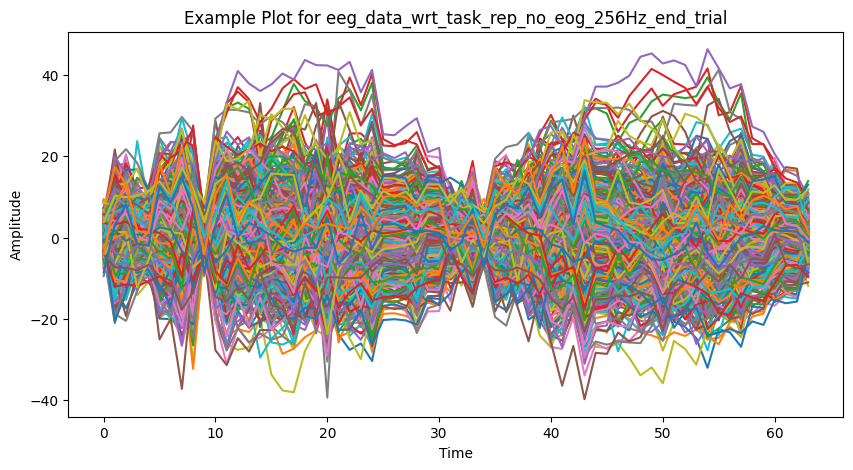

In [ ]:
import matplotlib.pyplot as plt
# Choose one of the variables to plot
variable_to_plot = 'eeg_data_wrt_task_rep_no_eog_256Hz_end_trial'

# Get the data for the chosen variable
variable_data1 = data[variable_to_plot]

# Plot the data (example)
plt.figure(figsize=(10, 5))
plt.plot(variable_data1[0, 0])  # Plotting the first cell of the first row
plt.title('Example Plot for ' + variable_to_plot)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
variable_data1.shape

(2, 100)

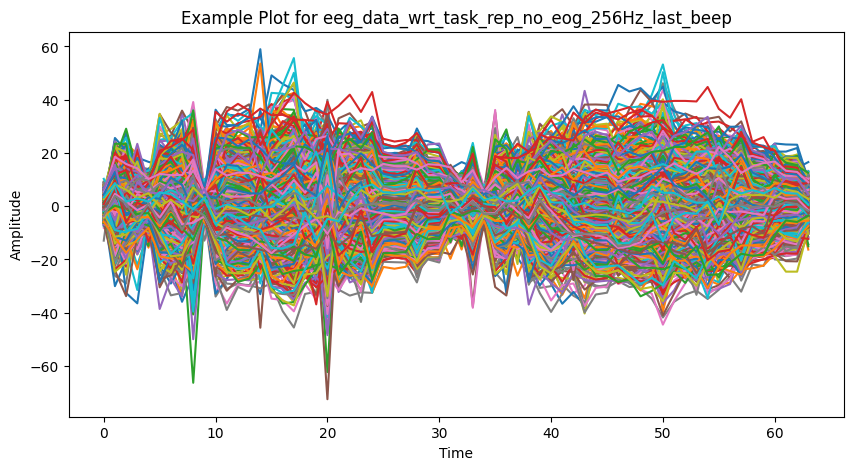

In [ ]:
variable_to_plot = 'eeg_data_wrt_task_rep_no_eog_256Hz_last_beep'

# Get the data for the chosen variable
variable_data = data[variable_to_plot]

# Plot the data (example)
plt.figure(figsize=(10, 5))
plt.plot(variable_data[0, 0])  # Plotting the first cell of the first row
plt.title('Example Plot for ' + variable_to_plot)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
variable_names = list(data.keys())
print(variable_names)

['__header__', '__version__', '__globals__', 'eeg_data_wrt_task_rep_no_eog_256Hz_end_trial', 'eeg_data_wrt_task_rep_no_eog_256Hz_last_beep']


In [ ]:
daa1 = variable_data1[0, 0]
daa1.shape
daa3 = variable_data1[1, 0]

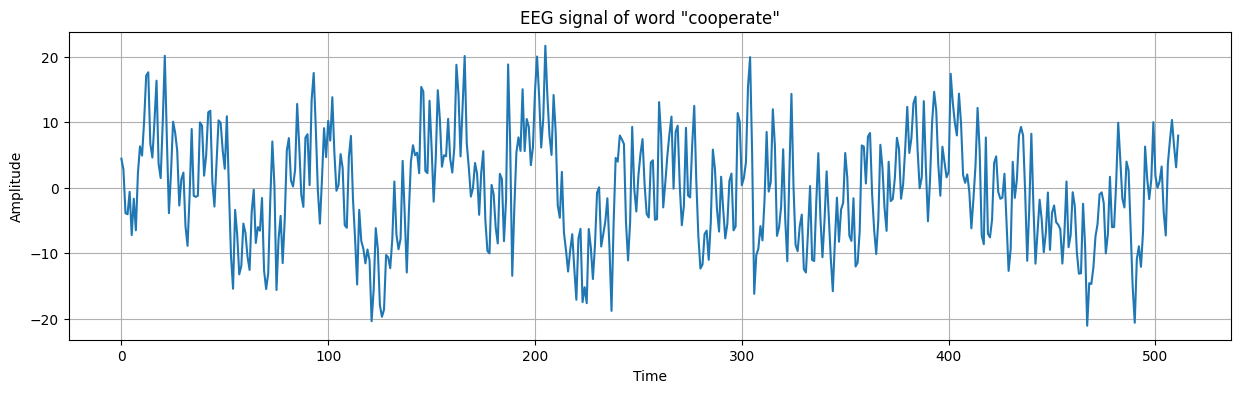

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(daa1[1, :])  # Plotting the first cell of the first row
plt.title('EEG signal of word "cooperate"')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


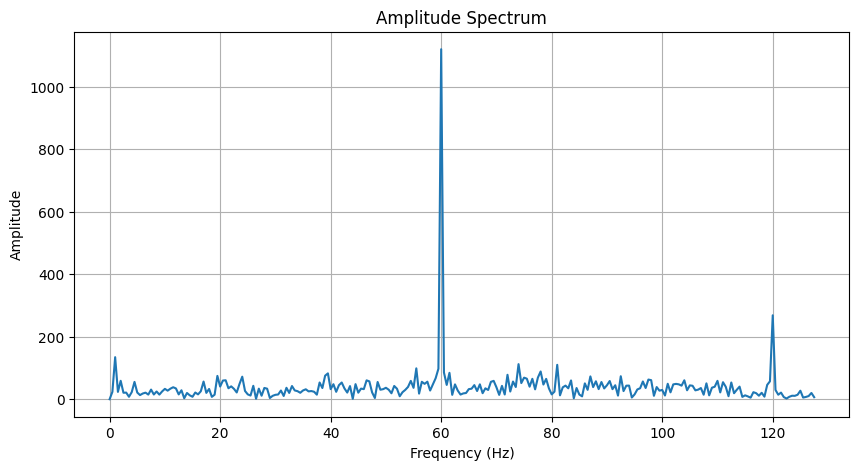

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the Fourier Transform of the signal
fft_signal = np.fft.fft(daa1[0, :])

# Compute the frequencies corresponding to the FFT
sampling_rate = 256  # Assuming a sampling rate of 256 Hz
freqs = np.fft.fftfreq(len(daa1[0, :]), 1/sampling_rate)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2])
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


5th order Butterworth Bandpass Filter

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt

# Define filter parameters
fs = 256  # Sampling frequency (Hz)
lowcut = 8  # Low cutoff frequency (Hz)
highcut = 70  # High cutoff frequency (Hz)
order = 5  # Filter order

# Compute normalized cutoff frequencies
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

# Design Butterworth bandpass filter
b, a = butter(order, [low, high], btype='band')

# Apply filter to the signal
filtered_signals = np.empty_like(variable_data1)
for i in range(2):
    for j in range(100):
        filtered_signals[i, j] = filtfilt(b, a, variable_data1[i, j])

In [ ]:
daa2 = filtered_signals[0, 0]

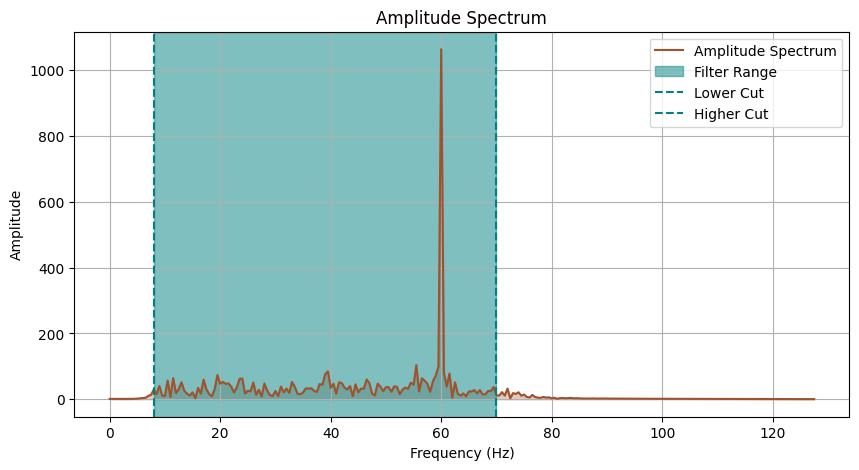

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the Fourier Transform of the signal
fft_signal = np.fft.fft(daa2[0, :])

# Compute the frequencies corresponding to the FFT
sampling_rate = 256  # Assuming a sampling rate of 256 Hz
freqs = np.fft.fftfreq(len(daa2[0, :]), 1/sampling_rate)

# Frequency range for the filter
lower_cut = 8
higher_cut = 70

# Plot the amplitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2], color='sienna', label='Amplitude Spectrum')
plt.fill_between(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2], color='sienna', alpha=0.3)

# Highlight the frequency range of the filter
plt.axvspan(lower_cut, higher_cut, color='teal', alpha=0.5, label='Filter Range')

# Highlight the boundaries of the filter
plt.axvline(x=lower_cut, color='teal', linestyle='--', label='Lower Cut')
plt.axvline(x=higher_cut, color='teal', linestyle='--', label='Higher Cut')

plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
filtered_signals.shape

(2, 100)

Notch filter to remove 60hz frequency signal

In [ ]:
from scipy.signal import iirnotch, filtfilt

# Define the notch filter parameters
f0 = 60.0  # Frequency to be removed (Hz)
Q = 30.0   # Quality factor

# Compute the notch filter coefficients
b_notch, a_notch = iirnotch(f0, Q, fs)

# Apply the notch filter to the signal
notched_signals = np.empty_like(filtered_signals)
for i in range(2):
    for j in range(100):
        notched_signals[i, j] = filtfilt(b_notch, a_notch, filtered_signals[i, j])


In [ ]:
notched_signals.shape

(2, 100)

In [ ]:
daa3 = notched_signals[0, 0]

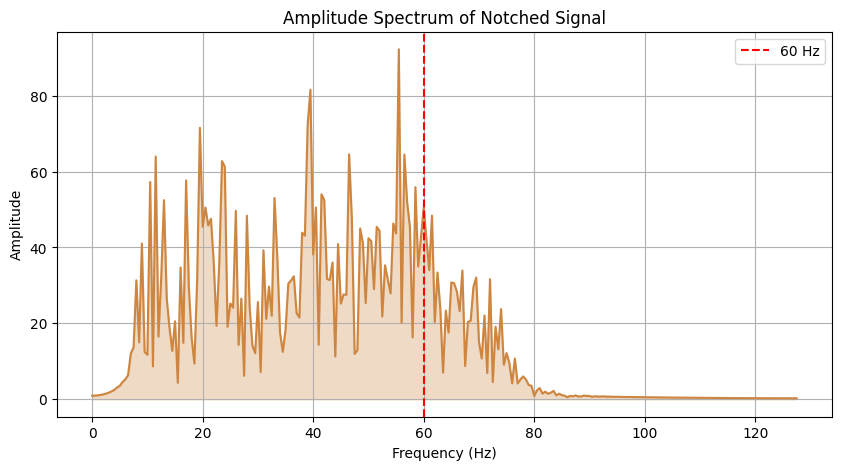

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the Fourier Transform of the signal
fft_signal = np.fft.fft(daa3[0, :])

# Compute the frequencies corresponding to the FFT
sampling_rate = 256  # Assuming a sampling rate of 256 Hz
freqs = np.fft.fftfreq(len(daa3[0, :]), 1/sampling_rate)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2], color='peru')
plt.title('Amplitude Spectrum of Notched Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

# Fill the lower part of the graph with olive color
plt.fill_between(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2], color='peru', alpha=0.3)

# Draw a dashed line at 60 Hz frequency
plt.axvline(x=60, color='red', linestyle='--', label='60 Hz')

plt.legend()
plt.show()


In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist_freq = 0.5 * fs
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Define frequency bands
alpha_band = (8, 13)
beta_band = (13, 30)
gamma_band = (30, 70)

# Define sampling frequency (replace this with your actual sampling frequency)
fs = 256
alpha_data = np.empty_like(notched_signals)
beta_data = np.empty_like(notched_signals)
gamma_data = np.empty_like(notched_signals)

for i in range(2):
    for j in range(100):
        alpha_data[i, j] = bandpass_filter(notched_signals[i, j], alpha_band[0], alpha_band[1], fs)
        beta_data[i, j] = bandpass_filter(notched_signals[i, j], beta_band[0], beta_band[1], fs)
        gamma_data[i, j] = bandpass_filter(notched_signals[i, j], gamma_band[0], gamma_band[1], fs)

# Now alpha_data, beta_data, and gamma_data contain the filtered data for the respective frequency bands


In [ ]:
alpha_daa = alpha_data[0, 0]
beta_daa = beta_data[0, 0]
gamma_daa = gamma_data[0, 0]

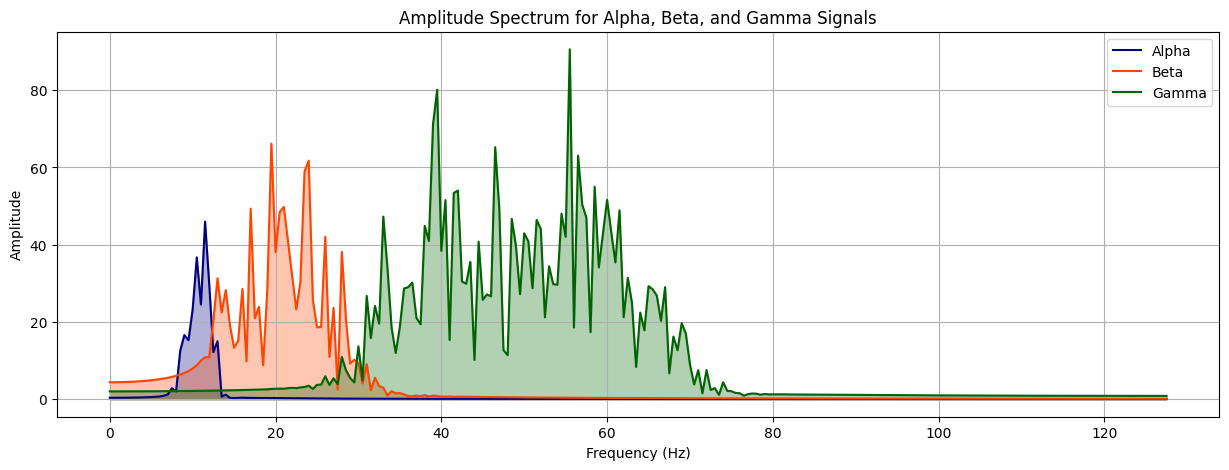

In [ ]:
# Compute the Fourier Transform of the signals
fft_alpha = np.fft.fft(alpha_daa[0, :])
fft_beta = np.fft.fft(beta_daa[0, :])
fft_gamma = np.fft.fft(gamma_daa[0, :])

# Compute the frequencies corresponding to the FFT
sampling_rate = 256  # Assuming a sampling rate of 256 Hz
freqs = np.fft.fftfreq(len(alpha_daa[0, :]), 1/sampling_rate)
# Plot the amplitude spectrum for alpha, beta, and gamma signals on the same plot
plt.figure(figsize=(15, 5))

# Plot the lines
plt.plot(freqs[:len(freqs)//2], np.abs(fft_alpha)[:len(freqs)//2], label='Alpha', color='navy')
plt.plot(freqs[:len(freqs)//2], np.abs(fft_beta)[:len(freqs)//2], label='Beta', color='orangered')
plt.plot(freqs[:len(freqs)//2], np.abs(fft_gamma)[:len(freqs)//2], label='Gamma', color='darkgreen')

# Fill the area under the lines
plt.fill_between(freqs[:len(freqs)//2], np.abs(fft_alpha)[:len(freqs)//2], color='navy', alpha=0.3)
plt.fill_between(freqs[:len(freqs)//2], np.abs(fft_beta)[:len(freqs)//2], color='orangered', alpha=0.3)
plt.fill_between(freqs[:len(freqs)//2], np.abs(fft_gamma)[:len(freqs)//2], color='darkgreen', alpha=0.3)

plt.title('Amplitude Spectrum for Alpha, Beta, and Gamma Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
signal = []
for row in alpha_data:
  for element in row:
    signal.append(element)

print(len(signal))

200


In [ ]:
import numpy as np
from scipy.signal import hilbert

# Assuming alpha_daa is your EEG data array with shape (64, 512)

def compute_instantaneous_phase(data):
    """
    Compute instantaneous phase using Hilbert transform for each EEG channel.
    """
    phases = []
    for channel in data:
        analytic_signal = hilbert(channel)
        phase = np.angle(analytic_signal)
        phases.append(phase)
    return np.array(phases)

def compute_mpc(phase_data):
    """
    Compute Mean Phase Coherence (MPC) for all pairs of EEG channels.
    """
    num_channels = phase_data.shape[0]
    num_samples = phase_data.shape[1]
    mpc_matrix = np.zeros((num_channels, num_channels))

    for i in range(num_channels):
        for k in range(i+1, num_channels):
            mpc_sum = np.sum(np.cos(phase_data[i] - phase_data[k]))
            mpc = mpc_sum / num_samples
            mpc_matrix[i, k] = mpc
            mpc_matrix[k, i] = mpc  # Since MPC is symmetric

    return mpc_matrix

# Main code
mpc_matrix_alpha = np.empty_like(alpha_data)
mpc_matrix_beta = np.empty_like(beta_data)
mpc_matrix_gamma = np.empty_like(gamma_data)
instantaneous_phase_alpha_data = np.empty_like(alpha_data)
instantaneous_phase_beta_data = np.empty_like(beta_data)
instantaneous_phase_gamma_data = np.empty_like(gamma_data)

for i in range(2):
    for j in range(100):
        instantaneous_phase_alpha_data[i,j] = compute_instantaneous_phase(alpha_data[i,j])
        instantaneous_phase_beta_data[i,j] = compute_instantaneous_phase(beta_data[i,j])
        instantaneous_phase_gamma_data[i,j] = compute_instantaneous_phase(gamma_data[i,j])
        mpc_matrix_alpha[i,j] = compute_mpc(instantaneous_phase_alpha_data[i,j])
        mpc_matrix_beta[i,j] = compute_mpc(instantaneous_phase_beta_data[i,j])
        mpc_matrix_gamma[i,j] = compute_mpc(instantaneous_phase_gamma_data[i,j])

print("Alpha MPC Matrix Shape:", mpc_matrix_alpha.shape)
print("MPC Matrix:")
print(mpc_matrix_alpha)


Alpha MPC Matrix Shape: (2, 100)
MPC Matrix:
[[array([[ 0.        , -0.19041844,  0.07607368, ..., -0.1707409 ,
          -0.1931235 ,  0.58263905],
         [-0.19041844,  0.        ,  0.20929002, ...,  0.87809305,
           0.8724843 , -0.21188516],
         [ 0.07607368,  0.20929002,  0.        , ...,  0.23905508,
           0.24412606,  0.40207125],
         ...,
         [-0.1707409 ,  0.87809305,  0.23905508, ...,  0.        ,
           0.99493036, -0.15488958],
         [-0.1931235 ,  0.8724843 ,  0.24412606, ...,  0.99493036,
           0.        , -0.17910439],
         [ 0.58263905, -0.21188516,  0.40207125, ..., -0.15488958,
          -0.17910439,  0.        ]])
  array([[ 0.        , -0.24769137, -0.43786652, ..., -0.28482141,
          -0.27586986, -0.2875429 ],
         [-0.24769137,  0.        ,  0.61786743, ...,  0.78543211,
           0.76207716,  0.07633317],
         [-0.43786652,  0.61786743,  0.        , ...,  0.46368603,
           0.4633549 ,  0.40059327],
    

In [ ]:
import numpy as np
from scipy import signal

# Assuming you have your EEG dataset stored in a variable called 'eeg_data'
# 'eeg_data' should be a 2D numpy array with shape (64, 512), representing 64 channels and 512 data points per channel.

# Main code
msc_matrix_alpha = np.empty_like(alpha_data)
msc_matrix_beta = np.empty_like(beta_data)
msc_matrix_gamma = np.empty_like(gamma_data)
instantaneous_phase_alpha_data = np.empty_like(alpha_data)
instantaneous_phase_beta_data = np.empty_like(beta_data)
instantaneous_phase_gamma_data = np.empty_like(gamma_data)

for k in range(2):
    for l in range(100):
        alpha_daa = alpha_data[k,l]
        num_channels = alpha_daa.shape[0]  # Number of EEG channels
        num_data_points = alpha_daa.shape[1]  # Number of data points per channel

        # Initialize the MSC matrix
        msc_matrix = np.zeros((num_channels, num_channels))

        # Iterate over all pairs of channels
        for i in range(num_channels):
            for j in range(i+1, num_channels):
                # Compute the cross power spectral density using Welch's method
                _, cross_psd = signal.csd(alpha_daa[i], alpha_daa[j], fs=1.0, window='hamming', nperseg=num_data_points//8)

                # Compute the power spectral densities for both channels
                _, psd_i = signal.welch(alpha_daa[i], fs=1.0, window='hamming', nperseg=num_data_points//8)
                _, psd_j = signal.welch(alpha_daa[j], fs=1.0, window='hamming', nperseg=num_data_points//8)

                # Compute the MSC between the two channels
                msc = np.abs(cross_psd)**2 / (psd_i * psd_j)

                # Take the mean of the MSC values
                msc_mean = np.mean(msc)

                # Store the MSC value in the matrix (symmetrically)
                msc_matrix[i, j] = msc_mean
                msc_matrix[j, i] = msc_mean

        # Display the MSC matrix
        msc_matrix_alpha[k, l] = msc_matrix
print(msc_matrix_alpha.shape)

(2, 100)


In [ ]:
msc_matrix_beta = np.empty_like(beta_data)
for k in range(2):
    for l in range(100):
        alpha_daa = beta_data[k,l]
        num_channels = alpha_daa.shape[0]  # Number of EEG channels
        num_data_points = alpha_daa.shape[1]  # Number of data points per channel

        # Initialize the MSC matrix
        msc_matrix = np.zeros((num_channels, num_channels))

        # Iterate over all pairs of channels
        for i in range(num_channels):
            for j in range(i+1, num_channels):
                # Compute the cross power spectral density using Welch's method
                _, cross_psd = signal.csd(alpha_daa[i], alpha_daa[j], fs=1.0, window='hamming', nperseg=num_data_points//8)

                # Compute the power spectral densities for both channels
                _, psd_i = signal.welch(alpha_daa[i], fs=1.0, window='hamming', nperseg=num_data_points//8)
                _, psd_j = signal.welch(alpha_daa[j], fs=1.0, window='hamming', nperseg=num_data_points//8)

                # Compute the MSC between the two channels
                msc = np.abs(cross_psd)**2 / (psd_i * psd_j)

                # Take the mean of the MSC values
                msc_mean = np.mean(msc)

                # Store the MSC value in the matrix (symmetrically)
                msc_matrix[i, j] = msc_mean
                msc_matrix[j, i] = msc_mean

        # Display the MSC matrix
        msc_matrix_beta[k, l] = msc_matrix
print(msc_matrix_beta.shape)

(2, 100)


In [ ]:
msc_matrix_gamma = np.empty_like(gamma_data)
for k in range(2):
    for l in range(100):
        alpha_daa = gamma_data[k,l]
        num_channels = alpha_daa.shape[0]  # Number of EEG channels
        num_data_points = alpha_daa.shape[1]  # Number of data points per channel

        # Initialize the MSC matrix
        msc_matrix = np.zeros((num_channels, num_channels))

        # Iterate over all pairs of channels
        for i in range(num_channels):
            for j in range(i+1, num_channels):
                # Compute the cross power spectral density using Welch's method
                _, cross_psd = signal.csd(alpha_daa[i], alpha_daa[j], fs=1.0, window='hamming', nperseg=num_data_points//8)

                # Compute the power spectral densities for both channels
                _, psd_i = signal.welch(alpha_daa[i], fs=1.0, window='hamming', nperseg=num_data_points//8)
                _, psd_j = signal.welch(alpha_daa[j], fs=1.0, window='hamming', nperseg=num_data_points//8)

                # Compute the MSC between the two channels
                msc = np.abs(cross_psd)**2 / (psd_i * psd_j)

                # Take the mean of the MSC values
                msc_mean = np.mean(msc)

                # Store the MSC value in the matrix (symmetrically)
                msc_matrix[i, j] = msc_mean
                msc_matrix[j, i] = msc_mean

        # Display the MSC matrix
        msc_matrix_gamma[k, l] = msc_matrix
print(msc_matrix_gamma.shape)

(2, 100)


In [ ]:
data_mpc = np.empty_like(alpha_data)
data_msc = np.empty_like(alpha_data)
data_add = np.empty_like(alpha_data)
for k in range(2):
    for l in range(100):
        mpc_matrix_alpha1 = mpc_matrix_alpha[k,l]
        mpc_matrix_beta1 = mpc_matrix_beta[k,l]
        mpc_matrix_gamma1 = mpc_matrix_gamma[k,l]
        msc_matrix_alpha1 = msc_matrix_alpha[k,l]
        msc_matrix_beta1 = msc_matrix_beta[k,l]
        msc_matrix_gamma1 = msc_matrix_gamma[k,l]
        data_3d_mpc = np.zeros((64, 64, 3))
        data_3d_msc = np.zeros((64, 64, 3))
        # Assign MPC and MSC matrices to the corresponding slices in the 3D array
        data_3d_mpc[:, :, 0] = mpc_matrix_alpha1  # Slice 0: MPC matrix for alpha band
        data_3d_mpc[:, :, 1] = mpc_matrix_beta1   # Slice 1: MPC matrix for beta band
        data_3d_mpc[:, :, 2] = mpc_matrix_gamma1  # Slice 2: MPC matrix for gamma band

        # Repeat for MSC matrices
        data_3d_msc[:, :, 0] = msc_matrix_alpha1  # Slice 0: MSC matrix for alpha band
        data_3d_msc[:, :, 1] = msc_matrix_beta1   # Slice 1: MSC matrix for beta band
        data_3d_msc[:, :, 2] = msc_matrix_gamma1  # Slice 2: MSC matrix for gamma band

        data_add[k,l] = data_3d_mpc + data_3d_msc
        data_mpc[k,l] = data_3d_mpc
        data_msc[k,l] = data_3d_msc
print(data_mpc.shape)
print(data_msc.shape)
print(data_add.shape)

(2, 100)
(2, 100)
(2, 100)


In [ ]:
import pandas as pd
data = pd.DataFrame(data)
data.to_csv("data.csv", index = False)

In [ ]:
data[0,0].shape

(64, 64, 3)

In [ ]:
import numpy as np

# Assuming 'data' is a 2x100 matrix where each element is a 64x64x3 matrix
# Let's split 'data' into 'in_data' and 'corporate_data'
in_data = data_add[0]        # First row (representations for 'in')
corporate_data = data_add[1] # Second row (representations for 'corporate')

# Create labels
num_samples = in_data.shape[0] + corporate_data.shape[0]
labels = np.concatenate((np.zeros(num_samples // 2), np.ones(num_samples // 2)))

# Combine 'in_data' and 'corporate_data' into a single dataset
combined_data = np.concatenate((in_data, corporate_data), axis=0)

# Shuffle data and labels together
shuffle_indices = np.random.permutation(len(combined_data))
combined_data = combined_data[shuffle_indices]
labels = labels[shuffle_indices]

# Split data into training and testing sets (e.g., 85% training, 20% testing)
split_ratio = 0.85
split_index = int(len(combined_data) * split_ratio)

X_train = combined_data[:split_index]
y_train = labels[:split_index]
X_test = combined_data[split_index:]
y_test = labels[split_index:]

# Sanity check
print(f"X_train shape: {X_train.shape}")  # Expected output: (160, 64, 64, 3) for 80% of 200 samples
print(f"y_train shape: {y_train.shape}")  # Expected output: (160,) for corresponding labels
print(f"X_test shape: {X_test.shape}")    # Expected output: (40, 64, 64, 3) for remaining 20% of 200 samples
print(f"y_test shape: {y_test.shape}")    # Expected output: (40,) for corresponding labels


X_train shape: (170,)
y_train shape: (170,)
X_test shape: (30,)
y_test shape: (30,)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Assuming you have loaded and preprocessed data: X_train, y_train, X_test, y_test

# Convert the labels to one-hot encoding
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Reshape the input data to match the input shape of the CNN
input_shape = (64, 64, 3)
X_train = np.array([np.reshape(x, input_shape) for x in X_train])
X_test = np.array([np.reshape(x, input_shape) for x in X_test])

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Manually calculate the number of elements in each layer
def count_elements(layer):
    if isinstance(layer, Conv2D):
        # Calculate number of parameters in Conv2D layer
        num_params = np.prod(layer.kernel_size) * layer.filters + layer.filters
        return num_params
    elif isinstance(layer, Dense):
        # Calculate number of parameters in Dense layer
        num_params = layer.units * (layer.input_shape[-1] + 1)
        return num_params
    elif isinstance(layer, Flatten):
        # Calculate number of elements flattened by Flatten layer
        input_shape = np.prod(layer.input_shape[1:])
        return input_shape

# Print number of elements in each layer
for layer in model.layers:
    print(f"Layer {layer.name}: {count_elements(layer)}")

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Layer conv2d_36: 320
Layer max_pooling2d_36: None
Layer conv2d_37: 640
Layer max_pooling2d_37: None
Layer flatten_18: 12544
Layer dense_42: 1605760
Layer dense_43: 258
Epoch 1/20
22/22 [==============================] - 7s 94ms/step - loss: 0.8404 - accuracy: 0.5294 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 2/20
22/22 [==============================] - 1s 52ms/step - loss: 0.6911 - accuracy: 0.5529 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 3/20
22/22 [==============================] - 1s 53ms/step - loss: 0.6917 - accuracy: 0.5059 - val_loss: 0.6890 - val_accuracy: 0.5667
Epoch 4/20
22/22 [==============================] - 1s 52ms/step - loss: 0.6836 - accuracy: 0.5176 - val_loss: 0.7496 - val_accuracy: 0.5000
Epoch 5/20
22/22 [==============================] - 1s 51ms/step - loss: 0.6971 - accuracy: 0.5824 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 6/20
22/22 [==============================] - 1s 52ms/step - loss: 0.6815 - accuracy: 0.5824 - val_loss: 0.6914 - val_acc

1/1 [==============================] - 0s 139ms/step


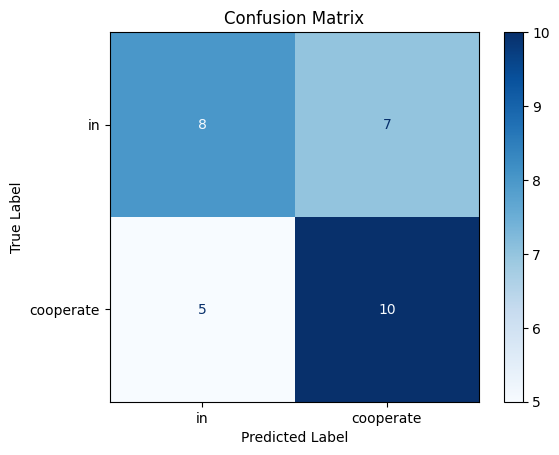

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to classes

# Convert one-hot encoded true labels back to classes
y_true_classes = np.argmax(y_test, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
classes = ['in', 'cooperate']  # Assuming you have binary classification
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

conf_matrix_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Save DataFrame to CSV file
output_filename = 'confusion_matrix.csv'
conf_matrix_df.to_csv(output_filename)

print(f"Confusion matrix data saved to '{output_filename}'")

Confusion matrix data saved to 'confusion_matrix.csv'


In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Assuming you have loaded and preprocessed data: X_train, y_train, X_test, y_test

# Convert the labels to one-hot encoding
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Reshape the input data to match the input shape of ResNet-50
input_shape = (64, 64, 3)
X_train = np.array([np.reshape(x, input_shape) for x in X_train])
X_test = np.array([np.reshape(x, input_shape) for x in X_test])

# Load the ResNet-50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers on top of the base ResNet-50 model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base ResNet-50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/10
11/11 [==============================] - 10s 548ms/step - loss: 0.8254 - accuracy: 0.4647 - val_loss: 1.2474 - val_accuracy: 0.4333
Epoch 2/10
11/11 [==============================] - 3s 300ms/step - loss: 0.9696 - accuracy: 0.5412 - val_loss: 1.0119 - val_accuracy: 0.4333
Epoch 3/10
11/11 [==============================] - 3s 265ms/step - loss: 0.8617 - accuracy: 0.4706 - val_loss: 0.6857 - val_accuracy: 0.5667
Epoch 4/10
11/11 [==============================] - 3s 289ms/step - loss: 0.7300 - accuracy: 0.5118 - val_loss: 0.7368 - val_accuracy: 0.4333
Epoch 5/10
11/11 [==============================] - 4s 420ms/step - loss: 0.7120 - accuracy: 0.5000 - val_loss: 0.7077 - val_accuracy: 0.4333
Epoch 6/10
11/11 [==============================] - 4s 343ms/step - loss: 0.6934 - accuracy: 0.5235 - val_loss: 0.7640 - val_accuracy: 0.4333
Epoch 7/10
11/11 [==============================] - 3s 288ms/step - loss: 0.7127 - accuracy: 0.5118 - val_loss: 0.6955 - val_accuracy: 0.5667
Epoch

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the ResNet50-based model with custom output layers
def build_custom_resnet50(num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Load your preprocessed data (replace with your actual data loading/preprocessing code)
# Example:
# X_train = ...
# y_train = ...
# X_test = ...
# y_test = ...

# Set the number of classes based on your specific task
num_classes = 2  # Adjust based on your class labels ('in' vs 'corporate')

# Build the custom ResNet50 model
model = build_custom_resnet50(num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if y_train is one-hot encoded
              metrics=['accuracy'])

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# Convert one-hot encoded labels (y_test) to integer labels
y_test_int = np.argmax(y_test, axis=1)

# Calculate test accuracy based on integer labels
test_accuracy = accuracy_score(y_test_int, y_pred_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')


2/2 [==============================] - 3s 204ms/step
Test Accuracy: 0.4250
